In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression, Ridge, RidgeCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

ModuleNotFoundError: No module named 'pandas'

In [14]:
file_path = "M1_final.csv"

In [15]:
df = pd.read_csv(file_path)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [16]:
df.dropna(inplace=True)
df["Dew Point"] = df["Dew Point"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8825 entries, 0 to 8824
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              8825 non-null   int64  
 1   DAY_OF_MONTH       8825 non-null   int64  
 2   DAY_OF_WEEK        8825 non-null   int64  
 3   OP_UNIQUE_CARRIER  8825 non-null   object 
 4   TAIL_NUM           8825 non-null   object 
 5   DEST               8825 non-null   object 
 6   DEP_DELAY          8825 non-null   int64  
 7   CRS_ELAPSED_TIME   8825 non-null   int64  
 8   DISTANCE           8825 non-null   int64  
 9   CRS_DEP_M          8825 non-null   int64  
 10  DEP_TIME_M         8825 non-null   int64  
 11  CRS_ARR_M          8825 non-null   int64  
 12  Temperature        8825 non-null   int64  
 13  Dew Point          8825 non-null   int64  
 14  Humidity           8825 non-null   int64  
 15  Wind               8825 non-null   object 
 16  Wind Speed         8825 

In [17]:
le = LabelEncoder()
df_le = df.copy()
for x in df_le.select_dtypes(["object_"]).columns:
    df_le[x] = le.fit_transform(df_le[x]).astype("str")
df_le

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,985,10,-1,124,636,324,...,34,58,15,25,38,29.86,3,9,17,14
1,11,1,5,3,1467,26,-7,371,2475,340,...,34,58,15,25,38,29.86,3,9,17,15
2,11,1,5,3,1385,19,40,181,1069,301,...,34,58,15,25,38,29.86,3,9,17,22
3,11,1,5,3,1481,28,-2,168,944,345,...,34,58,15,25,38,29.86,3,9,17,12
4,11,1,5,4,1122,1,-4,139,760,360,...,32,58,15,24,35,29.91,3,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820,11,27,3,0,79,18,-2,137,509,1040,...,50,89,9,17,0,29.60,0,28,27,27
8821,11,27,3,1,17,26,20,384,2475,1020,...,50,89,9,17,0,29.60,0,28,27,27
8822,11,27,3,3,1376,58,-8,379,2521,1052,...,50,89,9,17,0,29.60,0,28,27,16
8823,11,27,3,3,617,49,4,192,1074,1041,...,50,89,9,17,0,29.60,0,28,27,17


In [18]:
from sklearn.preprocessing import LabelEncoder as LE
df=df.drop("TAIL_NUM",axis=1).copy()
df.sch_dep=LE().fit_transform(df.sch_dep)
df.Condition =LE().fit_transform(df.Condition)
df.Wind =LE().fit_transform(df.Wind.astype(str))
df.DEST=LE().fit_transform(df.DEST)
df.OP_UNIQUE_CARRIER=LE().fit_transform(df.OP_UNIQUE_CARRIER)
##%%


In [19]:
from sklearn.model_selection import train_test_split

X = df_le.drop("TAXI_OUT", axis=1)
Y = df_le["TAXI_OUT"]

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 7942
Testing set size: 883


<Axes: >

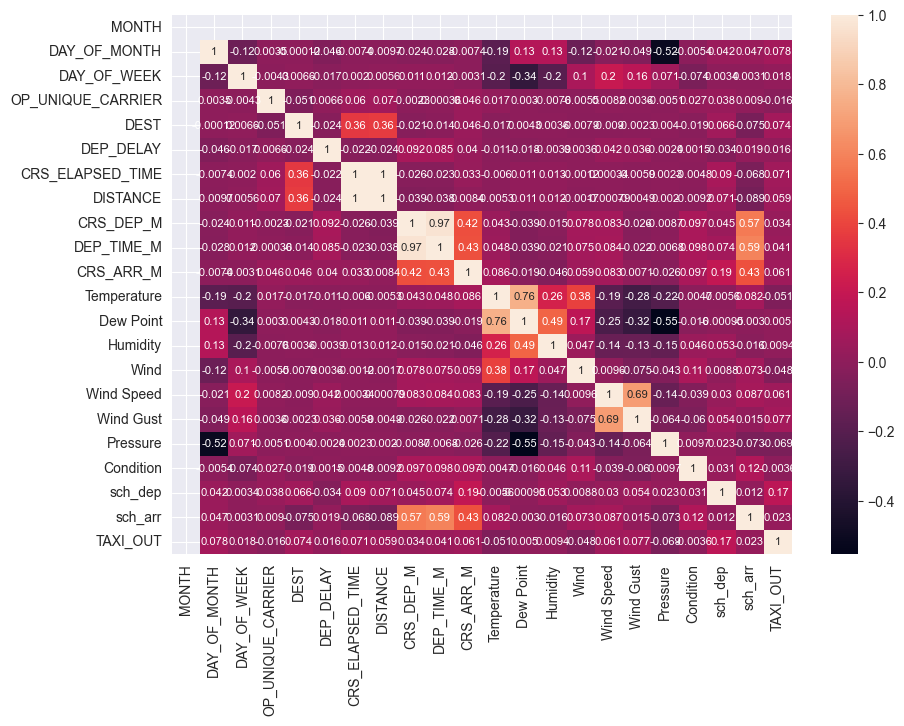

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 8})

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define a range of values for any hyperparameters you want to tune (for linear regression, there's usually none)
# In this case, we don't have hyperparameters to tune, so we won't iterate over any range

# Create a linear regression model
linear_model = LinearRegression()

# Perform cross-validation
# Here, cv parameter determines the number of folds in cross-validation
# You can adjust it based on your preference
scores = cross_val_score(linear_model, X_train, Y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", scores)

# Calculate mean cross-validation score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)


Cross-validation scores: [0.06772178 0.04388245 0.05830482 0.04981606 0.05594348]
Mean cross-validation score: 0.05513371881553979


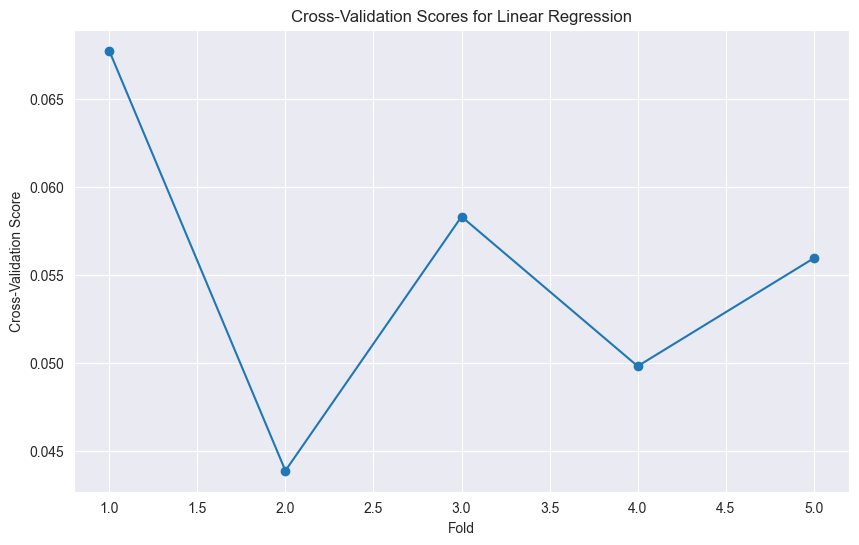

In [22]:
import matplotlib.pyplot as plt

# Create an empty plot since there are no hyperparameters to plot against accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores, marker='o', linestyle='-')  
plt.title('Cross-Validation Scores for Linear Regression')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 (or higher if needed)

# Train the logistic regression model
logistic_model.fit(X_train, Y_train)  # assuming you have Y_train defined

# Make predictions on the test set
predictions = logistic_model.predict(X_test)

# Evaluate the model
accuracy = logistic_model.score(X_test, Y_test)  # assuming you have Y_test defined
print("Accuracy:", accuracy)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(logistic_model, X_train, Y_train, cv=5)
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)


C:\Users\sobak\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.06908267270668177


C:\Users\sobak\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sobak\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [ ]:
# Create an empty plot since there are no hyperparameters to plot against accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), logistic_cv_scores, marker='o', linestyle='-')  
plt.title('Cross-Validation Scores for Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()


In [ ]:
# Assuming you have a dataset where the features are stored in a variable X and the labels in a variable y

# Now you can use train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming you have your features X_train and labels y_train defined

# Define a range of values for the max_depth hyperparameter
max_depth_values = range(1, 21)  # You can adjust the range as needed

# Define an empty list to store the cross-validation scores
cv_scores = []

# Iterate over each max_depth value
for max_depth in max_depth_values:
    # Create a Random Forest classifier with the current max_depth value
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    
    # Perform 5-fold cross-validation and compute the mean accuracy
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # Append the mean accuracy to the list of cross-validation scores
    cv_scores.append(mean_score)

# Find the best value for max_depth
best_max_depth = max_depth_values[np.argmax(cv_scores)]
best_score = cv_scores[np.argmax(cv_scores)]

# Print the best value for max_depth and its corresponding mean cross-validation score
print("Best max_depth:", best_max_depth)
print("Mean cross-validation score for the best max_depth:", best_score)

